## 数据准备代码分析
1. **封装函数**，在加载音频对`MP3`文件进行文件转换为`wav`文件，并对`wav`文件只提取前`10s`，读取数据后转换为列表设置采样率统一为`220500`进行归一化，最终转化为`numpy`数组。

2. **封装函数**，进行MFCC特征提取 ==参数数据，采样率==， 其中MFCC系数选取为`40`，获取信息多，噪声也多。返回值二维数组，列为每一帧，行为每一系数，后使用`numpy`对每帧的`nfcc`系数取平均值，得到` 1 * `维数据（？ MFCC的变种吗？）

In [1]:
import os
import pickle
import re
import librosa
import numpy as np
from time import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib notebook

# 加载音频
def wav_load(file):
        wav_data, sr = librosa.load(file, duration=10)
        wav_data = wav_data.tolist()
        while len(wav_data) < 220500:
            wav_data.append(0)  # 长度归一化
        if len(wav_data) > 220500:
            wav_data = wav_data[0:220500]
        wav_data = np.array(wav_data)
        return wav_data, sr


# MFCC特征提取
def get_matrix(wav_data, sr):
    return np.mean(librosa.feature.mfcc(y=wav_data, sr=sr, n_mfcc=40), axis=0)


## 数据提取分析


In [2]:

Positive = os.listdir('../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Positive/')
Negative = os.listdir('../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Negative/')
Negative


['1000_Negative_female_28_cough.wav',
 '1001_Negative_male_27_cough.wav',
 '1002_Negative_male_30_cough.wav',
 '1003_Negative_female_29_cough.wav',
 '1004_Negative_female_41_cough.wav',
 '1005_Negative_male_59_cough.wav',
 '1006_Negative_male_39_cough.wav',
 '1007_Negative_male_20_cough.wav',
 '1009_Negative_male_33_cough.wav',
 '1010_Negative_male_39_cough.wav',
 '1011_Negative_male_19_cough.wav',
 '1012_Negative_female_26_cough.wav',
 '1013_Negative_male_42_cough.wav',
 '1014_Negative_male_45_cough.wav',
 '1015_Negative_male_23_cough.wav',
 '1016_Negative_male_40_cough.wav',
 '1017_Negative_male_50_cough.wav',
 '1018_Negative_female_40_cough.wav',
 '1020_Negative_male_44_cough.wav',
 '1023_Negative_male_32_cough.wav',
 '1024_Negative_male_32_cough.wav',
 '1025_Negative_male_27_cough.wav',
 '1027_Negative_female_30_cough.wav',
 '1029_Negative_male_36_cough.wav',
 '1031_Negative_male_18_cough.wav',
 '1032_Negative_female_43_cough.wav',
 '1033_Negative_male_27_cough.wav',
 '1034_Negativ

'1008_Positive_male_32_cough.wav'

(40, 431)

array([-13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129, -13.07690129, -13.07690129,
       -13.07690129, -13.07690129,  -6.297649  ,  -3.3862179 ,
        -1.72478237,  -2.51833475,  -5.36636066,  -7.54

(431,)

<IPython.core.display.Javascript object>


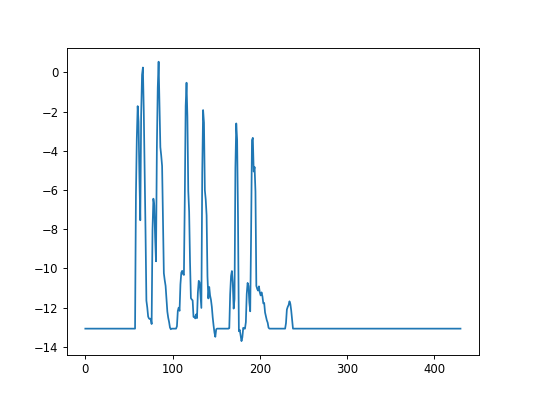

In [3]:
Positive[0]
test = Positive[0]
wav, s = wav_load('../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Positive/'+test)
matrix = get_matrix(wav, s) 
librosa.feature.mfcc(y=wav, sr=s, n_mfcc=40).shape
matrix
matrix.shape
plt.plot(matrix)

In [4]:
data = []
labels = []
begin = time() 

for p in Positive:
    wav, s = wav_load('../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Positive/'+p)
    matrix = get_matrix(wav, s)
    data.append(matrix)
    labels.append(1)
for n in Negative:
    wav, s = wav_load('../../数据集收集/中国科学技术大学_新冠肺炎声音诊断挑战赛/初赛训练集/cough/Negative/' + n)
    matrix = get_matrix(wav, s)
    data.append(matrix)
    labels.append(0)

end = time()
data = np.array(data)
labels = np.array(labels)
print('done 耗时', end-begin)

done 耗时 62.689985513687134


In [5]:
data.shape
labels.shape

(957, 431)

(957,)

## 数据集划分分析

循环遍历每个文件收集数据，并记录耗时，划分训练集`0.8` ,


In [6]:
# 划分数据集
ratioTrain = 0.8
numTrain = int(data.shape[0] * ratioTrain)
numTrain
permutation = np.random.permutation(data.shape[0])
permutation
data = data[permutation, :]  # 用permutation函数对输入数据X、Y进行随机排序，且要求随机排序后的X Y中的值保持原来的对应关系
labels = labels[permutation]
labels # 查看是否打乱  比例不对其实也会导致模型偏差

765

array([660, 751,  21, 457, 370, 448, 508,  68, 482, 144, 511, 433, 866,
       780, 851, 642, 838, 398,  50, 652,  99, 191, 265, 284, 631, 735,
       889,  20, 930, 744, 897, 918, 137,  58, 632, 941, 550, 300, 949,
       475, 899,  23, 704, 216, 575,  65,  25,  39, 822, 305, 105, 825,
       353, 543, 534, 905, 248, 498, 539, 320, 515, 849,  64, 152, 720,
       657, 415, 174, 753,   1, 230, 768, 278, 685, 486, 171,   7, 422,
       217, 871, 647, 225, 781, 716, 219, 561, 450, 742, 106, 531, 620,
       479, 576, 373, 295,  34, 279, 793, 675, 291, 823, 364, 950, 707,
       241, 399, 270,  24,  79, 153, 455, 725, 394, 328, 160, 634, 460,
       154, 710, 159, 680, 138, 952, 378,  97, 493, 782, 411, 880, 313,
       461,  73, 453, 932, 718, 834, 857, 407, 203, 262,  74, 271,  43,
       593, 778, 640, 190, 890, 100, 282, 182, 547, 387,  27, 689, 229,
       867, 187, 802,  13, 204, 942, 913, 586, 893, 185, 304, 108, 330,
       817, 863, 383, 609, 377, 792, 626,  90, 335, 895, 198, 46

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [7]:
x_train = data[:numTrain]
x2 = data[numTrain:]
y_train = labels[:numTrain]
y2 = labels[numTrain:]

在划分测试集的基础上，在测试集再次划分出验证集

In [11]:
ratioVal = 0.8
numVal = int(x2.shape[0] * ratioVal)
"验证集个数" 
numVal
permutation2 = np.random.permutation(x2.shape[0])
x2 = x2[permutation2, :]
y2 = y2[permutation2]
x_val = x2[:numVal]
x_test = x2[numVal:]
y_val = y2[:numVal]
y_test = y2[numVal:]

'验证集个数'

153

In [13]:
print('训练样本尺寸为：', x_train.shape)
print('训练标签尺寸为：', y_train.shape)
print('验证样本尺寸为：', x_val.shape)
print('验证标签尺寸为：', y_val.shape)
print('测试样本尺寸为：', x_test.shape)
print('测试标签尺寸为：', y_test.shape)


dic = dict()
dic['x_train'] = x_train
dic['x_val'] = x_val
dic['x_test'] = x_test
dic['y_train'] = y_train
dic['y_val'] = y_val
dic['y_test'] = y_test
dic
with open('mfcc_model_para_dict_plus.pkl', 'wb') as f:
    pickle.dump(dic, f)
f.close()
print('done')

训练样本尺寸为： (765, 431)
训练标签尺寸为： (765,)
验证样本尺寸为： (153, 431)
验证标签尺寸为： (153,)
测试样本尺寸为： (39, 431)
测试标签尺寸为： (39,)


{'x_train': array([[-13.78812457, -13.78812457, -13.78812457, ..., -13.78812457,
         -13.78812457, -13.78812457],
        [-15.91450547, -15.91450547, -15.91450547, ..., -15.91450547,
         -15.91450547, -15.91450547],
        [ -7.04197894,  -5.84805534,  -7.64918113, ..., -13.441159  ,
         -13.441159  , -13.441159  ],
        ...,
        [-14.49654862, -14.49654862, -14.32058632, ..., -14.49654862,
         -14.49654862, -14.49654862],
        [-13.95998577, -13.95998577, -13.93873314, ..., -13.95998577,
         -13.95998577, -13.95998577],
        [-13.27673966, -13.27673966, -13.27673966, ..., -13.27673966,
         -13.27673966, -13.27673966]]),
 'x_val': array([[-14.5379707 , -14.4227417 , -14.55212507, ..., -14.5379707 ,
         -14.5379707 , -14.5379707 ],
        [-13.5820779 , -13.5820779 , -13.5820779 , ..., -13.5820779 ,
         -13.5820779 , -13.5820779 ],
        [-12.44113431, -12.44113431, -12.44113431, ..., -12.44113431,
         -12.44113431, -12.4411

done
